# Quantum hardware

> $H_2$ basic case

**State preparation on IBM Quantum hardware, ibm_brisbane**

- $H_2$ with distance $0.735 \AA$,
- Parity mapping ($n=2$), 
- ansatz from the literature (state perparation), 
- L-BFGS-B optimizer.

Outcome:

- One ground state energy calculated, convergence data captured.

In [1]:
from lib.hamiltonian_builder import h2_hamiltonian_parity
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import numpy as np
from matplotlib import pyplot as plt
from qiskit_algorithms.optimizers import L_BFGS_B
from datetime import datetime

## Hamiltonian

In [2]:
hamiltonian = h2_hamiltonian_parity(0.735)
print(hamiltonian)

SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05237325+0.j,  0.39793742+0.j, -0.39793742+0.j, -0.0112801 +0.j,
  0.1809312 +0.j])


## Ansatz

Ansatz from: https://pmc.ncbi.nlm.nih.gov/articles/PMC9979602/

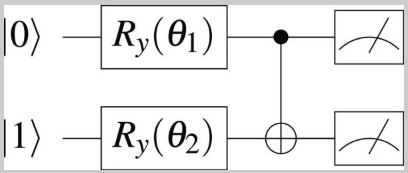

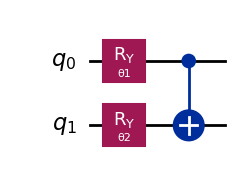

In [3]:
theta1 = Parameter('θ1')
theta2 = Parameter('θ2')

ansatz = QuantumCircuit(2)
ansatz.ry(theta1, 0)
ansatz.ry(theta2, 1)
ansatz.cx(0, 1)
ansatz.draw("mpl", style="iqp")

## Optimizer

In [4]:
optimizer = L_BFGS_B(gtol=1e-5, maxiter=20) # FIX MAX ITER!!!!

## Quantum hardware and run

In [5]:
# Fetch backend and transpile
backend_name = "ibm_brisbane"
service = QiskitRuntimeService()
backend = service.backend(backend_name)
print("Done getting backend")
print("Backend coupling map:")
print(backend.configuration().coupling_map)
print("Backend basis gates:")
print(backend.configuration().basis_gates)

/tmp/ipykernel_133531/1699507931.py:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


Done getting backend
Backend coupling map:
[[1, 0], [2, 1], [3, 2], [4, 3], [4, 5], [4, 15], [6, 5], [6, 7], [7, 8], [8, 9], [10, 9], [10, 11], [11, 12], [12, 17], [13, 12], [14, 0], [14, 18], [15, 22], [16, 8], [16, 26], [17, 30], [18, 19], [20, 19], [20, 33], [21, 20], [21, 22], [22, 23], [24, 23], [24, 34], [25, 24], [26, 25], [27, 26], [28, 27], [28, 29], [28, 35], [30, 29], [30, 31], [31, 32], [32, 36], [33, 39], [34, 43], [35, 47], [36, 51], [37, 38], [39, 38], [40, 39], [40, 41], [41, 53], [42, 41], [42, 43], [43, 44], [44, 45], [46, 45], [46, 47], [48, 47], [48, 49], [50, 49], [50, 51], [52, 37], [52, 56], [53, 60], [54, 45], [54, 64], [55, 49], [55, 68], [56, 57], [57, 58], [58, 59], [58, 71], [59, 60], [60, 61], [62, 61], [62, 63], [62, 72], [63, 64], [65, 64], [65, 66], [67, 66], [67, 68], [69, 68], [69, 70], [73, 66], [74, 70], [74, 89], [75, 90], [76, 75], [77, 71], [77, 76], [77, 78], [79, 78], [79, 80], [80, 81], [81, 72], [81, 82], [82, 83], [83, 92], [84, 83], [85, 73]

In [6]:
from pprint import pprint
pprint(backend.properties().to_dict())

{'backend_name': 'ibm_brisbane',
 'backend_version': '1.1.114',
 'gates': [{'gate': 'id',
            'name': 'id0',
            'parameters': [{'date': datetime.datetime(2025, 5, 20, 2, 44, 43, tzinfo=tzlocal()),
                            'name': 'gate_error',
                            'unit': '',
                            'value': 0.00018186496386428307},
                           {'date': datetime.datetime(2025, 5, 20, 2, 44, 43, tzinfo=tzlocal()),
                            'name': 'gate_length',
                            'unit': 'ns',
                            'value': 60}],
            'qubits': [0]},
           {'gate': 'id',
            'name': 'id1',
            'parameters': [{'date': datetime.datetime(2025, 5, 20, 2, 44, 43, tzinfo=tzlocal()),
                            'name': 'gate_error',
                            'unit': '',
                            'value': 0.00014536543174453008},
                           {'date': datetime.datetime(2025, 5, 20, 2, 4

In [7]:
pprint(backend.configuration().to_dict())


{'acquisition_latency': [],
 'allow_q_object': True,
 'backend_name': 'ibm_brisbane',
 'backend_version': '1.1.114',
 'basis_gates': ['ecr', 'id', 'rz', 'sx', 'x'],
 'channels': {'acquire0': {'operates': {'qubits': [0]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire1': {'operates': {'qubits': [1]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire10': {'operates': {'qubits': [10]},
                            'purpose': 'acquire',
                            'type': 'acquire'},
              'acquire100': {'operates': {'qubits': [100]},
                             'purpose': 'acquire',
                             'type': 'acquire'},
              'acquire101': {'operates': {'qubits': [101]},
                             'purpose': 'acquire',
                             'type': 'acquire'},
              'acquire102': {'operates': {'qubits': [10

In [ ]:
# Define the optimization function

In [ ]:
# Execute backend

## Postprocess and plotting

In [ ]:
# Print all the data, runtime etc.

In [ ]:
# Ger other ansatze data from simulator together with the same thing on simulator. Or maybe run with multiple distances on backend...

In [ ]:
# Plot the data